# Collectibles and triggers dev

In [1]:
# Base Data Science snippet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time
from tqdm import tqdm_notebook

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../../")
from westworld.environment import GridEnvironment
from westworld.agents import BaseGridAgent
from westworld.agents.collectible_finder import CollectibleFinderAgent
from westworld.objects import BaseObstacle,BaseTrigger,BaseCollectible
from westworld.simulation import Simulation
from westworld.colors import *
from westworld.logger import Logger

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


# First collectible env

Setting up a new session...


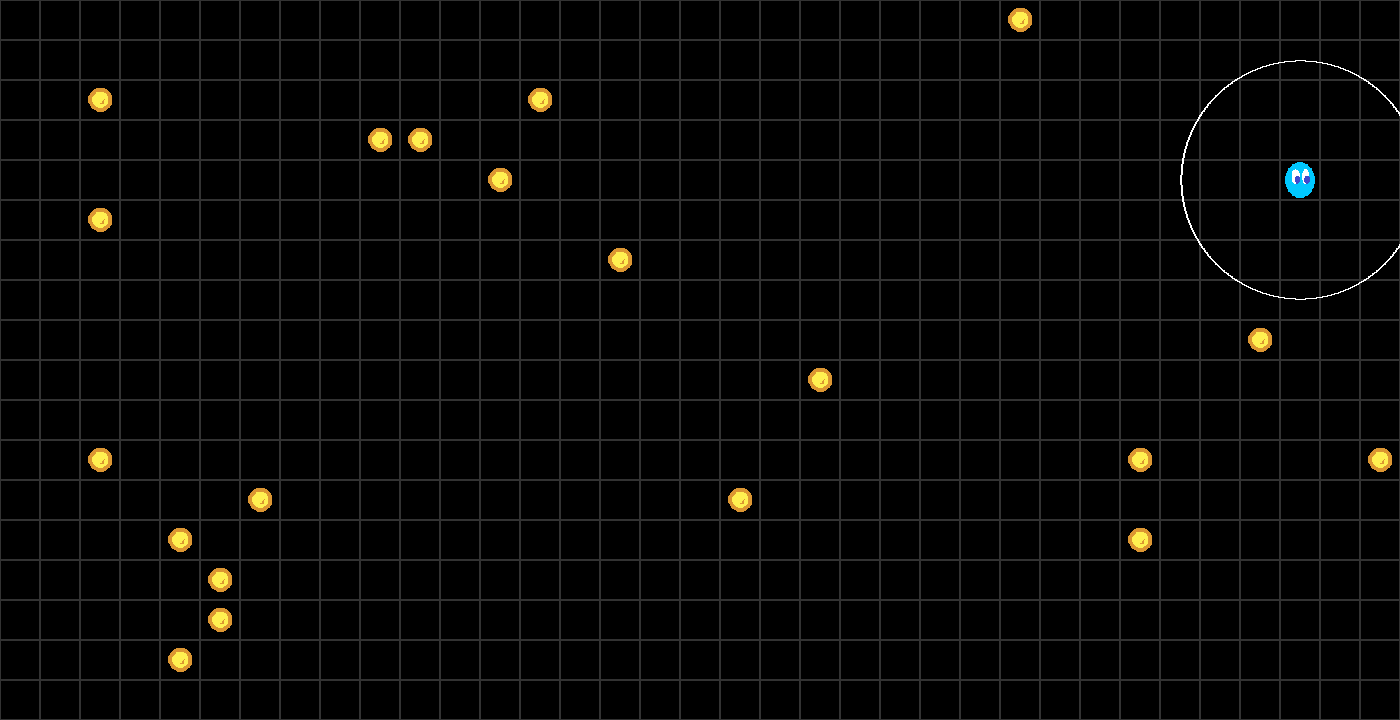

In [32]:
obstacle = BaseObstacle(10,0,1,7,color = RED)
agent_spawner = lambda x,y : CollectibleFinderAgent(x,y,color = (0,200,255),show_search_radius=True,search_radius = 3,img_asset = "blob")
coll_spawner = lambda x,y : BaseCollectible(x,y,color = (220,150,50),img_asset = "ball")
 

logger = Logger(use_visdom = True,freq_update = 5)

class Env(GridEnvironment):
    
    def callback_step(self):
        n = len(self.find_objects({"collectible":True}))
        logger.log_metric("n_collectible",n)
        logger.log_metric("n_collectible2",n*2)

    
    
# Setup grid
CELL_SIZE = 40
env = Env(cell_size = CELL_SIZE,show_grid = True)
env.spawn(agent_spawner,1)
env.spawn(coll_spawner,20)
env.render()
env.get_img()

In [109]:
env.quit()

# Run simulation

In [33]:
sim = Simulation(env,fps = 25)

In [34]:
sim.run_episode(n_steps = 500,save = False,replay=True)

interactive(children=(Play(value=0, description='Press play', interval=200, max=500), Output()), _dom_classes=…

IntSlider(value=0, max=500)

In [21]:
logger.init_visdom_server()

Setting up a new session...
